# Tugas 2 : Diskritisasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Untuk membaca dataset kita bisa mengunduh dataset dari internet kemudian mengupload dataset tersebut ke dalam repository github. Setelah itu menyalin link raw dataset yang ada dalam repo untuk dibaca dengan cara dibawah ini

In [ ]:
url = "https://raw.githubusercontent.com/SitiUlunNuhaKarimah127/datamining/main/IRIS.csv"
dataset = pd.read_csv(url)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#1. Equal Width Intervals

Equal-width intervals adalah discretization yang membagi data numerik menjadi beberapa kelompok dengan lebar kelompok yang kurang lebih sama besar.

In [ ]:
panjang_kelopak = dataset[["sepal_length"]]
lebar_kelopak = dataset[["sepal_width"]]
panjang_daunkelopak = dataset[["petal_length"]]
lebar_daunkelopak = dataset[["petal_width"]]

Membuat fungsi cut yang digunakan untuk mencari interval menggunakan metode Equal-Width-Intervals

In [ ]:
def cut(col, k):
  intervals = pd.cut(dataset[col], k).value_counts().index.to_list()
  return [[interval.left, interval.right] for interval in intervals]

In [ ]:
def toCategory(list_interval, col):
  #get length interval
  length = len(list_interval)

  #sorting interval
  sort_interval = np.sort(list_interval, axis=0)

  #get category from interval
  categories = np.array([chr(65+i) for i in range(length)]) [:, None]

  # Combine into interval data
  intervals = np.hstack((sort_interval, categories))

  # operate all data
  newCol = []
  for i, row in dataset.iterrows():
    d = row[col]
    for interval in intervals:
      if d >= interval[0].astype(float) and d <= interval[1].astype(float):
        newCol.append(interval[2])
        break

  # return new column category
  return np.array(newCol, dtype=str)




Mencari interval dengan membaginya menjadi 3 bagian

In [ ]:
interval_panjang_kelopak = cut("sepal_length", 3)
interval_lebar_kelopak = cut("sepal_width", 3)
interval_panjang_daunkelopak = cut("petal_length", 3)
interval_lebar_daunkelopak = cut("petal_width", 3)

print("Interval_panjang_kelopak = ", interval_panjang_kelopak)
print("Interval_lebar_kelopak = ", interval_lebar_kelopak)
print("Interval_panjang_daunkelopak = ", interval_panjang_daunkelopak)
print("Interval_lebar_daunkelopak = ", interval_lebar_daunkelopak)

Interval_panjang_kelopak =  [[5.5, 6.7], [4.296, 5.5], [6.7, 7.9]]
Interval_lebar_kelopak =  [[2.8, 3.6], [1.998, 2.8], [3.6, 4.4]]
Interval_panjang_daunkelopak =  [[2.967, 4.933], [0.994, 2.967], [4.933, 6.9]]
Interval_lebar_daunkelopak =  [[0.9, 1.7], [0.0976, 0.9], [1.7, 2.5]]


Menampilkan hasil kategori

In [ ]:
panjang_kelopak["category"] = toCategory(interval_panjang_kelopak, "sepal_length")
lebar_kelopak["category"] = toCategory(interval_lebar_kelopak, "sepal_width")
panjang_daunkelopak["category"] = toCategory(interval_panjang_daunkelopak, "petal_length")
lebar_daunkelopak["category"] = toCategory(interval_lebar_daunkelopak, "petal_width")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
print('Pengelompokan panjang kelopak bunga iris')
display(panjang_kelopak)

Pengelompokan panjang kelopak bunga iris


,sepal_length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,B
146,6.3,B
147,6.5,B
148,6.2,B


In [ ]:
print('Pengelompokkan Lebar Kelopak Bunga Iris')
display(lebar_kelopak)

Pengelompokkan Lebar Kelopak Bunga Iris


,sepal_width,category
0,3.5,B
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,B
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,B


In [ ]:
print('Pengelompokkan Panjang Daun Kelopak Bunga Iris')
display(panjang_daunkelopak)

Pengelompokkan Panjang Daun Kelopak Bunga Iris


,petal_length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


In [ ]:
print('Pengelompokkan Lebar Daun Kelopak Bunga Iris')
display(lebar_daunkelopak)

Pengelompokkan Lebar Daun Kelopak Bunga Iris


,petal_width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


#2. Equal Frequency Intervalss

Equal-frequency intervals adalah discretization yang membagi data numerik menjadi beberapa kelompok dengan jumlah anggota yang kurang lebih sama besar.

Pandas menyediakan method qcut untuk mencari nilai interval dari Equal_frequency Intervals

In [ ]:
def qcut(col, k):
  intervals = pd.qcut(dataset[col], k).value_counts().index.to_list()
  return [[interval.left, interval.right] for interval in intervals]

Mencari interval dengan membaginya menjadi 3 bagian

In [ ]:
q_interval_panjang_kelopak = qcut("sepal_length", 3)
q_interval_lebar_kelopak = qcut("sepal_width", 3)
q_interval_panjang_daunkelopak = qcut("petal_length", 3)
q_interval_lebar_daunkelopak = qcut("petal_width", 3)

print("Interval_panjang_kelopak = ", q_interval_panjang_kelopak)
print("Interval_lebar_kelopak = ", q_interval_lebar_kelopak)
print("Interval_panjang_daunkelopak = ", q_interval_panjang_daunkelopak)
print("Interval_lebar_daunkelopak = ", q_interval_lebar_daunkelopak)

Interval_panjang_kelopak =  [[5.4, 6.3], [4.2989999999999995, 5.4], [6.3, 7.9]]
Interval_lebar_kelopak =  [[1.999, 2.9], [2.9, 3.2], [3.2, 4.4]]
Interval_panjang_daunkelopak =  [[2.633, 4.9], [0.999, 2.633], [4.9, 6.9]]
Interval_lebar_daunkelopak =  [[0.867, 1.6], [0.099, 0.867], [1.6, 2.5]]


Menampilkan Hasil Pembagian Category

In [ ]:
panjang_kelopak["category"] = toCategory(q_interval_panjang_kelopak, "sepal_length")
lebar_kelopak["category"] = toCategory(q_interval_lebar_kelopak, "sepal_width")
panjang_daunkelopak["category"] = toCategory(q_interval_panjang_daunkelopak, "petal_length")
lebar_daunkelopak["category"] = toCategory(q_interval_lebar_daunkelopak, "petal_width")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
print('Pengelompokkan Panjang Kelopak Bunga Iris')
display(panjang_kelopak)

Pengelompokkan Panjang Kelopak Bunga Iris


,sepal_length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,C
146,6.3,B
147,6.5,C
148,6.2,B


In [ ]:
print('Pengelompokkan Lebar Kelopak Bunga Iris')
display(lebar_kelopak)

Pengelompokkan Lebar Kelopak Bunga Iris


,sepal_width,category
0,3.5,C
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,C
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,C


In [ ]:
print('Pengelompokkan Panjang Daun Kelopak Bunga Iris')
display(panjang_daunkelopak)

Pengelompokkan Panjang Daun Kelopak Bunga Iris


,petal_length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


In [ ]:
print('Pengelompokkan Lebar Daun Kelopak Bunga Iris')
display(lebar_daunkelopak)

Pengelompokkan Lebar Daun Kelopak Bunga Iris


,petal_width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


#3. Entropy

Entropy adalah nilai informasi yang menyatakan ukuran ketidakpastian(impurity) dari attribut dari suatu kumpulan obyek data dalam satuan bit.

dalam tugas kali ini kita akan menggunakan data panjang kelopak(sepal length) sebagai sempel perhitungan.

In [ ]:
uji = dataset[["sepal_length"]]
uji.describe()

,sepal_length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


Membuat category random untuk semua data

In [ ]:
np.random.seed(0)
uji["category"] = np.where(np.random.choice(2, uji.shape[0]) < 1, "A", "B")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print('Pengelompokkan Data Uji Dengan Kategori Random')
uji

Pengelompokkan Data Uji Dengan Kategori Random


,sepal_length,category
0,5.1,A
1,4.9,B
2,4.7,B
3,4.6,A
4,5.0,B
...,...,...
145,6.7,A
146,6.3,B
147,6.5,B
148,6.2,B


Membuat fungsi getOverCategory yang digunakan untuk menghitung data keseluruhan yang nantinya digunakan untuk menghitung entropy

In [ ]:
def getOverCategory(col):
  group = uji.loc[:, :].groupby("category").count()
  a = group.loc["A", col]
  b = group.loc["B", col]
  return (a, b, a+b)

Fungsi splitter digunakan untuk membuat split antara value yang telah ditentukan lalu mengembalikkan data yang telah dipisahkan.

In [ ]:
def splitter(value:float, col:str)->tuple:
  # get data less and greater from value
  less = uji[uji[col] <= value]
  greater = uji[uji[col] > value]

  # calculate into category for each data
  less_group = less.loc[:, :].groupby("category").count()
  greater_group = greater.loc[:, :].groupby("category").count()

  # get value based on category
  less_category_A = less_group.loc["A", col] 
  less_category_B = less_group.loc["B", col] 
  greater_category_A = greater_group.loc["A", col] 
  greater_category_B = greater_group.loc["B", col] 

  return (
      [less_category_A, less_category_B, less_category_A + less_category_B],
      [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
  )

Membuat fungsi entropy untuk mencari nilai entropy

Rumus Mencari Entropy :

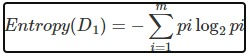

In [ ]:
def entropy(d):
  r1 = (d[0] / d[2]) * np.log2(d[0] / d[2]) 
  r2 = (d[1] / d[2]) * np.log2(d[1] / d[2]) 
  return np.sum([r1, r2]) * -1

Membuat Fungsi Info

In [ ]:
def info(d):
  r1 = (d[0][2] / uji.shape[0]) * entropy(d[0])
  r2 = (d[1][2] / uji.shape[0]) * entropy(d[1])
  return r1 + r2

Membuat fungsi gain untuk menghitung selisih antara entropy awal dengan yang baru.

Rumus Mencari Gain :
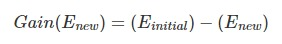



In [ ]:
def gain(Einitial, Enew):
  return Einitial - Enew

Membuat Dinitial

In [ ]:
D = getOverCategory("sepal_length")
entropy_d = entropy(D)
print("D = ",D)
print("Entropy D = ", entropy_d)

D =  (68, 82, 150)
Entropy D =  0.993707106604508


Melakukan beberapa tes split untuk mencari hasil dan informasi yang terbaik

Tes Pertama : Split 1:4.4

In [ ]:
split1  = splitter(4.4, "sepal_length")
info_split1 = info(split1)

print('Gain = ', gain(entropy_d, info_split1))

Gain =  0.003488151753460178


Tes Kedua : Split 2:5.5

In [ ]:
split2  = splitter(5.5, "sepal_length")
info_split2 = info(split2)

print('Gain = ', gain(entropy_d, info_split2))

Gain =  0.012302155146638905


Tes Ketiga : Split 3:7.0

In [ ]:
split3  = splitter(7.0, "sepal_length")
info_split3 = info(split3)

print('Gain = ', gain(entropy_d, info_split3))

Gain =  0.0005490214732508658


Dari seluruh hasil percobaan tes split yang telah dilakukan, maka diperoleh hasil split terbaik adalah split 3 warna yang memberikan keuntungan informasi sebesar 0.0005490214732508658, karena hasil tes split 3 memiliki nilai split yang terendah